<a href="https://colab.research.google.com/github/ROMAHI-UNA-PUNO/ROMAHI-UNA-PUNO/blob/main/Sistema_difuso(covid2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


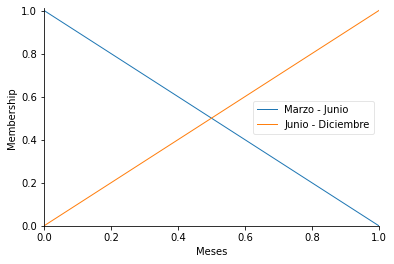

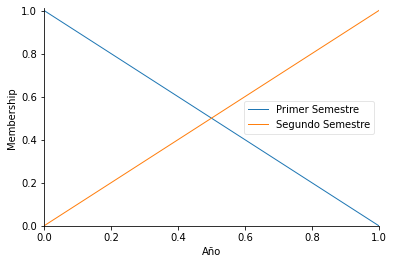

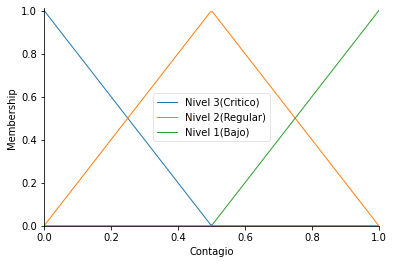

In [84]:
universeM = np.linspace(0,1,40);
universeA = np.linspace(0,1,140);
universeC = np.linspace(0,1,180);

# Variables linguisticas 
meses = ctrl.Antecedent(universeM, 'Meses' );
año = ctrl.Antecedent(universeA, 'Año' );
contagio = ctrl.Consequent(universeC, 'Contagio' );

# Etiquetas y conjunto asociados 
namesM = ['Marzo - Junio','Junio - Diciembre'];
namesA = ['Primer Semestre','Segundo Semestre'];
namesC = ['Nivel 3(Critico)','Nivel 2(Regular)','Nivel 1(Bajo)'];

meses.automf(names=namesM);
año.automf(names=namesA);
contagio.automf(names=namesC);
meses.view();
año.view();
contagio.view();

In [85]:
rule1= ctrl.Rule(antecedent=(meses['Marzo - Junio'] & año['Primer Semestre']), 
                 consequent=contagio['Nivel 1(Bajo)'],
                 label = "rule 1")
rule2= ctrl.Rule(antecedent=(meses['Marzo - Junio'] & año['Segundo Semestre']), 
                 consequent=contagio['Nivel 1(Bajo)'], 
                 label = "rule 2")
rule3= ctrl.Rule(antecedent=(meses['Junio - Diciembre'] & año['Primer Semestre']), 
                 consequent=contagio['Nivel 1(Bajo)'], 
                 label = "rule 3")
rule4= ctrl.Rule(antecedent=(meses['Junio - Diciembre'] & año['Segundo Semestre']), 
                 consequent=contagio['Nivel 3(Critico)'] , 
                 label = "rule 4")


In [86]:
import skfuzzy.control as ctrl
system = ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system);

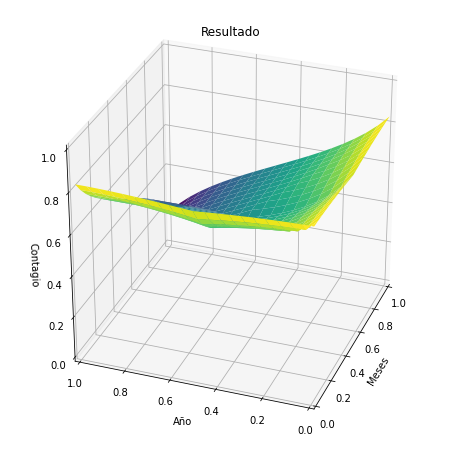

In [87]:
upsampled = np.linspace(0, 1, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(21):
  for j in range(21):
    sim.input['Meses'] = x[i,j]
    sim.input['Año']  = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Contagio']

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

plt.title('Resultado')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('Meses')
ax.set_ylabel('Año')
ax.set_zlabel('Contagio')
ax.view_init(30,200)